Looking for data in: C:\Users\Doctorricko97\Desktop\cyb499_phishing_detection\data\extracted\phishing
Raw data loaded. Columns: ['subject', 'body', 'label']

Class counts:
label
0    15791
1    13976
Name: count, dtype: int64


Token indices sequence length is longer than the specified maximum sequence length for this model (582 > 512). Running this sequence through the model will result in indexing errors


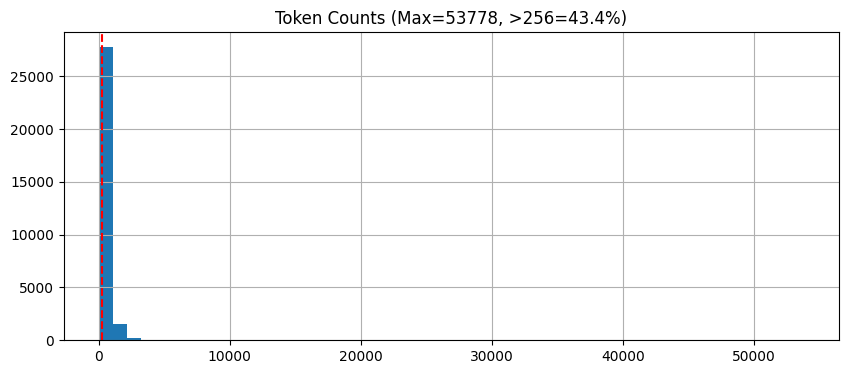


Phishing keyword frequency:
click     : 15.4% in phishing emails
urgent    : 2.6% in phishing emails
password  : 0.9% in phishing emails
verify    : 1.4% in phishing emails
account   : 11.3% in phishing emails

=== Sample Legitimate Email ===
hpl nom for may 25 , 2001

( see attached file : hplno 525 . xls )
- hplno 525 . xls...

=== Sample Phishing Email ===
d - link dwl - g 510 802 . 11 g wireless pci lan adapter @ $ 39 . 85

$ 39 . 85 dwl - g 510
high speed
2 . 4
ghz ( 802 . 11 g ) wireless pci lan
adapter
ieee 802 . 11 g standardupto
54 mbpsoperating frequency range - 2 . 4
ghz " is an ideal solution enabling wireless networking
capabilities ...


In [ ]:
# [1] Setup and Data Loading
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

# Verify paths match your actual structure
DATA_DIR = Path("C:/Your/absolute/path/cyb499_phishing_detection/data/extracted/phishing")
print(f"Looking for data in: {DATA_DIR}")
assert DATA_DIR.exists(), f"Path not found: {DATA_DIR}"

df = pd.read_csv(DATA_DIR / "enron.csv")
print("Raw data loaded. Columns:", df.columns.tolist())

# [2] Preprocess and Class Balance Check
df['text'] = df['subject'].fillna('') + "\n\n" + df['body'].fillna('')
class_counts = df['label'].value_counts()
print(f"\nClass counts:\n{class_counts}")

# [3] Token Length Analysis (Critical!)
tokenizer = AutoTokenizer.from_pretrained("roberta-base")
df['token_count'] = df['text'].apply(lambda x: len(tokenizer.tokenize(x)))

plt.figure(figsize=(10,4))
df['token_count'].hist(bins=50)
plt.axvline(x=256, color='r', linestyle='--')
plt.title(f"Token Counts (Max={df['token_count'].max()}, >256={(df['token_count']>256).mean():.1%})")
plt.show()

# [4] Phishing Keyword Check
keywords = ['click', 'urgent', 'password', 'verify', 'account']
print("\nPhishing keyword frequency:")
for word in keywords:
    freq = df[df['label']==1]['text'].str.contains(word, case=False).mean()
    print(f"{word:<10}: {freq:.1%} in phishing emails")

# [5] Sample Inspection
print("\n=== Sample Legitimate Email ===")
print(df[df['label']==0]['text'].iloc[0][:300] + "...")
print("\n=== Sample Phishing Email ===")
print(df[df['label']==1]['text'].iloc[0][:300] + "...")